# Demonstration of k-means algorithm

Cost function:

\begin{equation}
    J
    =
    \frac{1}{m}
    \sum_{i=1}^{m}
    || x^{(i)} - \mu_{c^{(i)}} ||^{2}
\end{equation}

**Note:**
- k-means can get stuck in local minimum which is not the global minimum.
    - Solution:
        - try multiple random initilizations (N)
        - look at $J_{l}$  (l=1,2,..,N)
        - Pick clustering that gives $min_{l} [J_{l}]$

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def eucledian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2))

In [3]:
def assign_to_clusters(X, mus):
    
    cluster_indices = []
    
    for x in X:
        
        d = np.inf

        
        for i,mu in enumerate(mus):

            d_current = eucledian_distance(x,mu)
            if d_current < d:
                d = d_current
                cluster_index = i
        cluster_indices.append(cluster_index)
    return np.array(cluster_indices)

In [4]:
def show_updates(X, mu_init, steps=10):
    
    mu_A = mu_init[0]
    mu_B = mu_init[1]
    
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1], c='grey')
    ax.scatter(mu_A[0], mu_A[1], c='purple', marker='x', s=100)
    ax.scatter(mu_B[0], mu_B[1], c='green', marker='x', s=100)
    
    costs = []
    
    for i in range(steps):
        
        # - Get cluster assignments
        ci = assign_to_clusters(X, [mu_A, mu_B])

        # - Move the cluster centroids
        mu_A = (np.mean(X[ci==0,0]), np.mean(X[ci==0,1]))
        mu_B = (np.mean(X[ci==1,0]), np.mean(X[ci==1,1]))
        mus = [mu_A, mu_B]
    
        fig, ax = plt.subplots()
        ax.scatter(X[ci==0,0], X[ci==0,1], c='purple') 
        ax.scatter(X[ci==1,0], X[ci==1,1], c='green')
        
        ax.scatter(mu_A[0], mu_A[1], c='purple', marker='x', s=100)
        ax.scatter(mu_B[0], mu_B[1], c='green', marker='x', s=100)
        
        cost = 0.0
        for i,xi in enumerate(X):
            cost += eucledian_distance(xi, mus[ci[i]])
        cost = cost/len(X)    
        costs.append(cost)
        
    return costs

In [5]:
X1_mean = [2.0, 2.0]
X1_cov = [[2.0, 0.0],
          [0.0, 2.0]]

X2_mean = [-2.0, -2.0]
X2_cov = [[2.0, 0.0],
          [0.0, 2.0]]

In [6]:
npts = 20

In [7]:
X1 = scipy.stats.multivariate_normal.rvs(mean=X1_mean, cov=X1_cov, size=npts)
X2 = scipy.stats.multivariate_normal.rvs(mean=X2_mean, cov=X2_cov, size=npts)

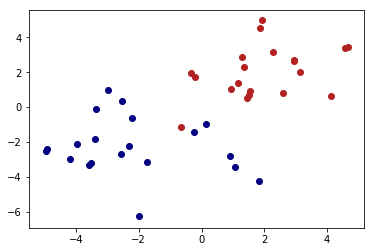

In [8]:
fig, ax = plt.subplots()
ax.scatter(X1[:,0], X1[:,1], c='firebrick')
ax.scatter(X2[:,0], X2[:,1], c='navy')

In [9]:
X = np.r_[X1, X2]

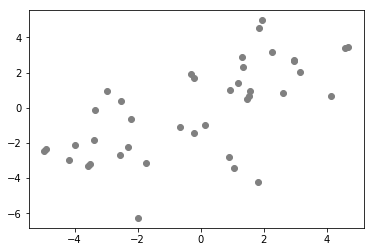

In [10]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c='grey')

In [11]:
mu_A_init = [scipy.stats.uniform.rvs(min(X[:,0]), max(X[:,0])), scipy.stats.uniform.rvs(min(X[:,1]), max(X[:,1]))]
mu_B_init = [scipy.stats.uniform.rvs(min(X[:,0]), max(X[:,0])), scipy.stats.uniform.rvs(min(X[:,1]), max(X[:,1]))]

In [12]:
mu_A_init = X[np.random.randint(low=0, high=npts)]
mu_B_init = X[np.random.randint(low=0, high=npts)]

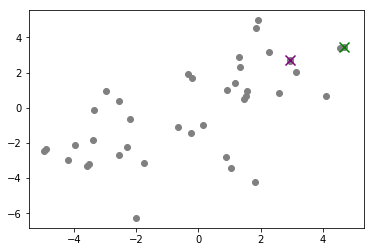

In [13]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c='grey')
ax.scatter(mu_A_init[0], mu_A_init[1], c='purple', marker='x', s=100)
ax.scatter(mu_B_init[0], mu_B_init[1], c='green', marker='x', s=100)

In [14]:
ci = assign_to_clusters(X, [mu_A_init, mu_B_init])

In [15]:
Xci = np.c_[X,ci]

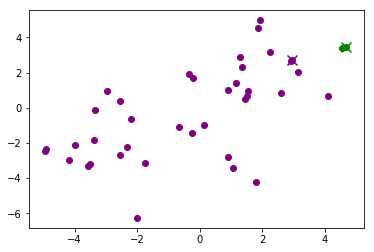

In [16]:
fig, ax = plt.subplots()
ax.scatter(mu_A_init[0], mu_A_init[1], c='purple', marker='x', s=100)
ax.scatter(mu_B_init[0], mu_B_init[1], c='green', marker='x', s=100)

ax.scatter(X[ci==0,0], X[ci==0,1], c='purple')
ax.scatter(X[ci==1,0], X[ci==1,1], c='green')

In [17]:
mu_A_new = (np.mean(X[ci==0,0]), np.mean(X[ci==0,1]))
mu_B_new = (np.mean(X[ci==1,0]), np.mean(X[ci==1,1]))

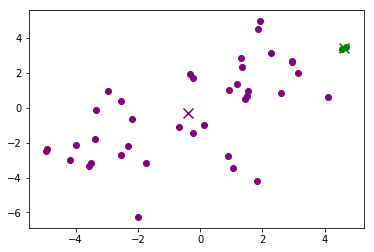

In [18]:
fig, ax = plt.subplots()
ax.scatter(mu_A_new[0], mu_A_new[1], c='purple', marker='x', s=100)
ax.scatter(mu_B_new[0], mu_B_new[1], c='green', marker='x', s=100)

ax.scatter(X[ci==0,0], X[ci==0,1], c='purple') 
ax.scatter(X[ci==1,0], X[ci==1,1], c='green')

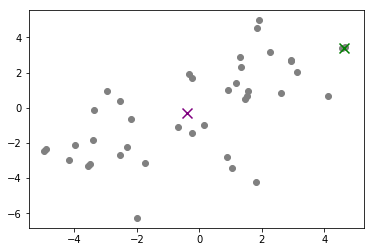

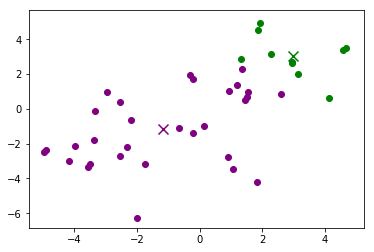

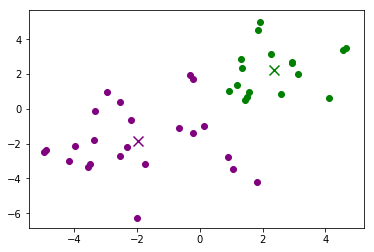

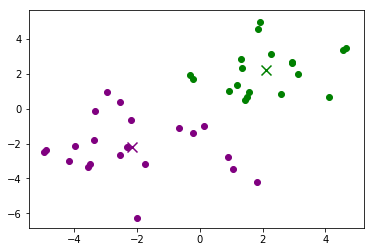

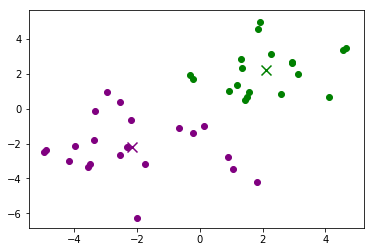

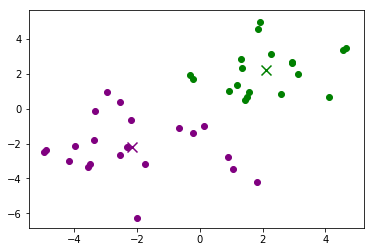

In [19]:
costs = show_updates(X, [mu_A_new, mu_B_new], steps=5)

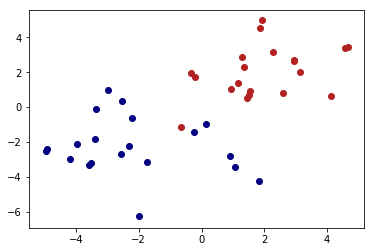

In [20]:
fig, ax = plt.subplots()
ax.scatter(X1[:,0], X1[:,1], c='firebrick')
ax.scatter(X2[:,0], X2[:,1], c='navy')

In [21]:
steps = 5

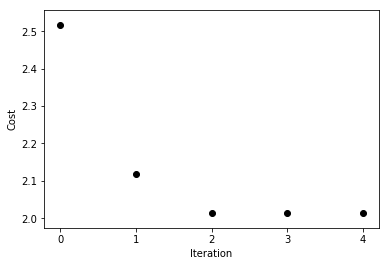

In [22]:
fig, ax = plt.subplots()
ax.scatter(range(steps), costs, c='k')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_xticks(range(steps));